<a href="https://colab.research.google.com/github/zachmakki15/IDS/blob/main/Project4_Problem2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Zach Makki

Intro Data Science

Project #4

Problem #2

03/20/2022

Allow for mix of python and R code

In [1]:
%load_ext rpy2.ipython

#Problem 2

##Import the Dataset

Import the dataset using pandas in python and dataframe in R

In [3]:
#Import the dataset in python
#Import the needed python libs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

dataFrame = pd.read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW4/nutrition_subset.csv")
dataFrame.head()

,food item,weight_in_grams,saturated_fat,cholesterol
0,GELATIN; DRY 1 ENVELP,7.00,0.0,0
1,SEAWEED; SPIRULINA; DRIED 1 OZ,28.35,0.8,0
2,YEAST; BAKERS; DRY; ACTIVE 1 PKG,7.00,0.0,0
3,PARMESAN CHEESE; GRATED 1 OZ,28.35,5.4,22
4,PARMESAN CHEESE; GRATED 1 CUP,100.00,19.1,79


In [4]:
#Import the dataset in R
%%R

library(readr)
rDataFrame <- read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW4/nutrition_subset.csv", show_col_types = FALSE)
head(rDataFrame)

# A tibble: 6 × 4
  `food item`                          weight_in_grams saturated_fat cholesterol
  <chr>                                          <dbl>         <dbl>       <dbl>
1 GELATIN; DRY                  1 ENV…             7             0             0
2 SEAWEED; SPIRULINA; DRIED     1 OZ              28.4           0.8           0
3 YEAST; BAKERS; DRY; ACTIVE    1 PKG              7             0             0
4 PARMESAN CHEESE; GRATED       1 OZ              28.4           5.4          22
5 PARMESAN CHEESE; GRATED       1 CUP            100            19.1          79
6 PARMESAN CHEESE; GRATED       1 TBSP             5             1             4


##Sort by Saturated Fat

Sort the dataframes by saturated fat to see which recipes/items in the dataset have the highest amount of saturated fat.

In [8]:
#Python sort
dataFrame_sorted = dataFrame.sort_values(by=['saturated_fat'], ascending=False)
dataFrame_sorted.head()

,food item,weight_in_grams,saturated_fat,cholesterol
378,CHEESECAKE 1 CAKE,1110.0,119.9,2053
535,ICE CREAM; VANLLA; RICH 16% FT1/2 GAL,1188.0,118.3,703
458,YELLOWCAKE W/ CHOCFRSTNG;COMML1 CAKE,1108.0,92.0,609
581,CREME PIE 1 PIE,910.0,90.1,46
890,LARD 1 CUP,205.0,80.4,195


In [9]:
#R sort
%%R

head(rDataFrame[order(rDataFrame$saturated_fat, decreasing=TRUE), ])

# A tibble: 6 × 4
  `food item`                          weight_in_grams saturated_fat cholesterol
  <chr>                                          <dbl>         <dbl>       <dbl>
1 CHEESECAKE                    1 CAKE            1110         120.         2053
2 ICE CREAM; VANLLA; RICH 16% FT1/2 G…            1188         118.          703
3 YELLOWCAKE W/ CHOCFRSTNG;COMML1 CAKE            1108          92           609
4 CREME PIE                     1 PIE              910          90.1          46
5 LARD                          1 CUP              205          80.4         195
6 ICE CREAM; VANLLA; REGULR 11% 1/2 G…            1064          71.3         476


The results here are hard to compare to each other because this dataset contains samples for both individual ingredients and for receipes. This is clear from the results above as the 5th highest sample is lard, an individual ingredient, and others such as the 4th highest Creme Pie are recepies. The individual ingredients are hard to even compare to each other as one entry here is for a half gallon of ice cream, thats not comparable in anyway to one cup of lard.

##Saturated Fat per Gram Sort

To work around the issues highlighted above a new attribute will be added to the dataset called saturated fat per gram. This will be calculated by dividing the saturaed fat by the weight in grams of each entry in the dataset, the resulting list will become the new attribute. This new attribute should allow comparsion between samples now, as saturated fat levels have been normalized by weight

In [10]:
#Python Create new column by dividing saturated_fat by weight_in_grams
def divide_columns(row):
  newVar = row['saturated_fat'] / row['weight_in_grams']
  return newVar

dataFrame['saturated_fat_per_gram'] = dataFrame.apply(lambda row: divide_columns(row), axis=1)
dataFrame.describe()

,weight_in_grams,saturated_fat,cholesterol,saturated_fat_per_gram
count,961.000000,961.000000,961.00000,961.000000
mean,149.409365,3.987617,32.55359,0.037168
std,175.909357,10.744359,119.96059,0.066131
min,0.400000,0.000000,0.00000,0.000000
25%,32.000000,0.000000,0.00000,0.000000
50%,113.000000,0.400000,0.00000,0.008000
75%,218.000000,3.300000,20.00000,0.047347
max,1542.000000,119.900000,2053.00000,0.507143


In [11]:
#R Create new column by dividing saturated_fat by weight_in_grams
%%R

rDataFrame <- transform(rDataFrame, saturated_fat_per_gram = saturated_fat / weight_in_grams)
summary(rDataFrame)

  food.item         weight_in_grams  saturated_fat      cholesterol     
 Length:961         Min.   :   0.4   Min.   :  0.000   Min.   :   0.00  
 Class :character   1st Qu.:  32.0   1st Qu.:  0.000   1st Qu.:   0.00  
 Mode  :character   Median : 113.0   Median :  0.400   Median :   0.00  
                    Mean   : 149.4   Mean   :  3.988   Mean   :  32.55  
                    3rd Qu.: 218.0   3rd Qu.:  3.300   3rd Qu.:  20.00  
                    Max.   :1542.0   Max.   :119.900   Max.   :2053.00  
 saturated_fat_per_gram
 Min.   :0.00000       
 1st Qu.:0.00000       
 Median :0.00800       
 Mean   :0.03717       
 3rd Qu.:0.04735       
 Max.   :0.50714       


Now that the new attribute has been added the dataset will be sorted by it to show the samples with the highest saturated fat per gram.

In [12]:
#Python Re-do the sort done previously, this time by saturated fat per gram
#Python sort
dataFrame_sorted = dataFrame.sort_values(by=['saturated_fat_per_gram'], ascending=False)
dataFrame_sorted.head()

,food item,weight_in_grams,saturated_fat,cholesterol,saturated_fat_per_gram
908,BUTTER; SALTED 1 TBSP,14.0,7.1,31,0.507143
909,BUTTER; UNSALTED 1 TBSP,14.0,7.1,31,0.507143
710,BUTTER; UNSALTED 1/2 CUP,113.0,57.1,247,0.505310
709,BUTTER; SALTED 1/2 CUP,113.0,57.1,247,0.505310
913,BUTTER; UNSALTED 1 PAT,5.0,2.5,11,0.500000


In [13]:
#R Re-do the sort done previously, this time by saturated fat per gram
#R sort
%%R

head(rDataFrame[order(rDataFrame$saturated_fat_per_gram, decreasing=TRUE), ])

                                food.item weight_in_grams saturated_fat
909  BUTTER; SALTED                1 TBSP              14           7.1
910  BUTTER; UNSALTED              1 TBSP              14           7.1
710 BUTTER; SALTED                1/2 CUP             113          57.1
711 BUTTER; UNSALTED              1/2 CUP             113          57.1
913   BUTTER; SALTED                1 PAT               5           2.5
914   BUTTER; UNSALTED              1 PAT               5           2.5
    cholesterol saturated_fat_per_gram
909          31              0.5071429
910          31              0.5071429
710         247              0.5053097
711         247              0.5053097
913          11              0.5000000
914          11              0.5000000


This results make sense since if there are multiple samples of the same ingredient with different portions those samples should always have the same saturated fat per gram. In this dataset butter has the most saturated fat per gram.

##Saturated Fat Per Gram Outliers

To find outliers in an attribute it is easier to first normalize the attribute using the standard scalar, this then allows the user to identify outliers simply be searching for values greater then three or less then neagtive three. 

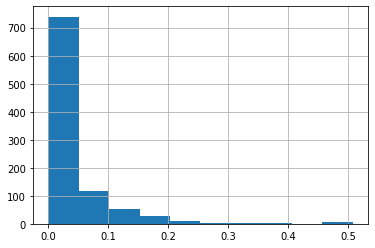

In [14]:
dataFrame['saturated_fat_per_gram'].hist()

In [15]:
#Python, Use standard scalar on saturated fat per gram attribute
from sklearn.preprocessing import StandardScaler
myscalar = StandardScaler()
saturatedFatPerGram_norm = myscalar.fit_transform(np.array(dataFrame['saturated_fat_per_gram']).reshape(-1,1))
dataFrame['saturated_fat_per_gram_norm'] = pd.DataFrame(saturatedFatPerGram_norm)
df_sfpg_outliers = dataFrame.query('saturated_fat_per_gram_norm > 3| saturated_fat_per_gram_norm < -3')


#get 5 worst outliers (max end)
df_sfpg_outliers.sort_values(by=['saturated_fat_per_gram_norm'], ascending=False)

,food item,weight_in_grams,saturated_fat,cholesterol,saturated_fat_per_gram,saturated_fat_per_gram_norm
908,BUTTER; SALTED 1 TBSP,14.00,7.1,31,0.507143,7.110475
909,BUTTER; UNSALTED 1 TBSP,14.00,7.1,31,0.507143,7.110475
709,BUTTER; SALTED 1/2 CUP,113.00,57.1,247,0.505310,7.082741
710,BUTTER; UNSALTED 1/2 CUP,113.00,57.1,247,0.505310,7.082741
912,BUTTER; SALTED 1 PAT,5.00,2.5,11,0.500000,7.002408
913,BUTTER; UNSALTED 1 PAT,5.00,2.5,11,0.500000,7.002408
899,LARD 1 TBSP,13.00,5.1,12,0.392308,5.373078
890,LARD 1 CUP,205.00,80.4,195,0.392195,5.371375
920,IMITATION CREAMERS; POWDERED 1 TSP,2.00,0.7,0,0.350000,4.732985
210,CHOCOLATE; BITTER OT BAKING 1 OZ,28.35,9.0,0,0.317460,4.240676


In [16]:
#R, Use scale on saturated fat per gram attribute
%%R

rDataFrame$scaled_saturated_fat_per_gram <- scale(x = rDataFrame$saturated_fat_per_gram)
rDataFrame_sfpgOutliers <- subset(rDataFrame, scaled_saturated_fat_per_gram > 3 | scaled_saturated_fat_per_gram < -3)

#display most extreme outliers
rDataFrame_sfpgOutliers[order(rDataFrame_sfpgOutliers$scaled_saturated_fat_per_gram, decreasing=TRUE), ]

                                food.item weight_in_grams saturated_fat
909  BUTTER; SALTED                1 TBSP           14.00           7.1
910  BUTTER; UNSALTED              1 TBSP           14.00           7.1
710 BUTTER; SALTED                1/2 CUP          113.00          57.1
711 BUTTER; UNSALTED              1/2 CUP          113.00          57.1
913   BUTTER; SALTED                1 PAT            5.00           2.5
914   BUTTER; UNSALTED              1 PAT            5.00           2.5
900  LARD                          1 TBSP           13.00           5.1
891   LARD                          1 CUP          205.00          80.4
921   IMITATION CREAMERS; POWDERED  1 TSP            2.00           0.7
211    CHOCOLATE; BITTER OT BAKING   1 OZ           28.35           9.0
493   COCONUT; DRIED; SWEETND;SHREDD1 CUP           93.00          29.3
577 COCONUT; RAW; PIECE           1 PIECE           45.00          13.4
449   COCONUT; RAW; SHREDDED        1 CUP           80.00       

From just displaying the results sorted by the max saturated fat per gram we can see that all the outliers are on the higher end of the values, there are 0 negative outliers, therefore there are 0 outliers less then the average.

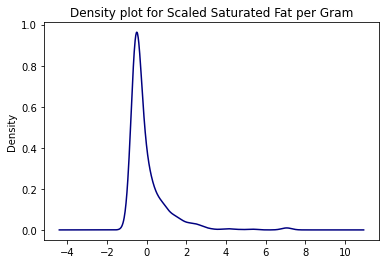

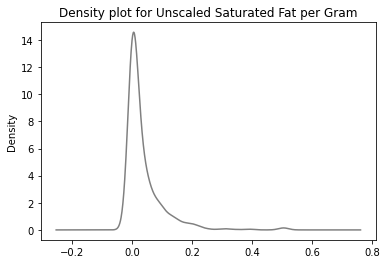

In [14]:
#Python Density Plot
dataFrame.saturated_fat_per_gram_norm.plot.density(color="navy")
plt.title('Density plot for Scaled Saturated Fat per Gram')
plt.show()

dataFrame.saturated_fat_per_gram.plot.density(color="grey")
plt.title('Density plot for Unscaled Saturated Fat per Gram')
plt.show()

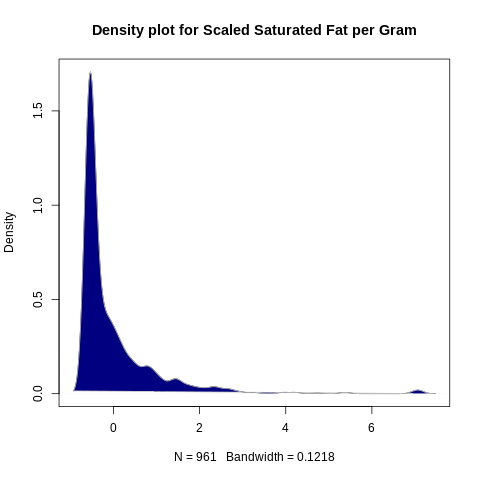

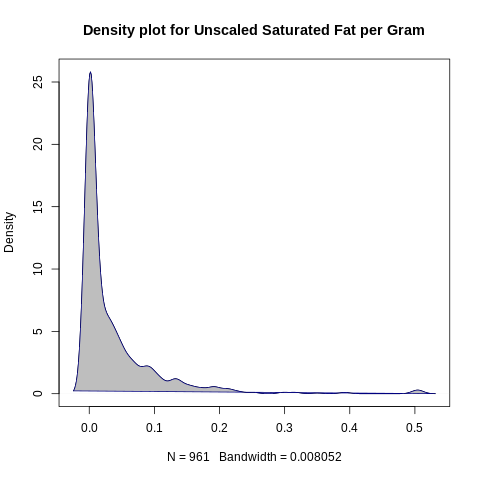

In [15]:
#R Density Plot
%%R

#Density plot for scaled data
density <- density(rDataFrame$scaled_saturated_fat_per_gram)
plot(density, main="Density plot for Scaled Saturated Fat per Gram") 
polygon(density, col="navy", border="grey")

#Density plot for unscaled data
density <- density(rDataFrame$saturated_fat_per_gram)
plot(density, main="Density plot for Unscaled Saturated Fat per Gram") 
polygon(density, col="grey", border="navy")

The density plots above confirm that all of the outliers for this attribute are greater then the average.

##Impute Missing Values

From looking at the information printed about the dataset above one can see that there is no null values in the dataset, so 0s will be considered as missing values. To see how many 0s there are in this dataset a histogram will be plotted of all the numeric attributes below.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9881057b10>,
      dtype=object)

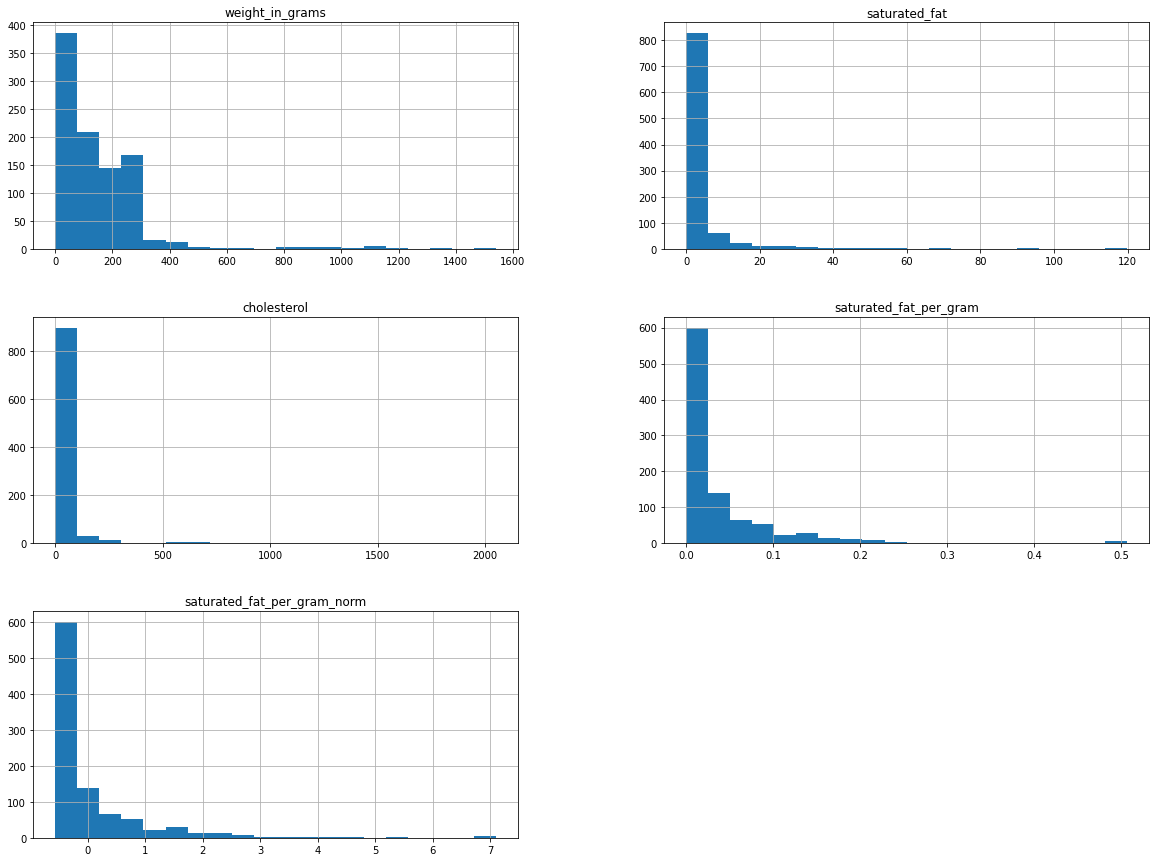

In [18]:
#Python impute
from sklearn.impute import SimpleImputer
dataFrame.hist(bins=20, figsize=(20,15))

The larger the number of bins used the more one can see how many values that look like 0 in this histogram are actually just very close to 0 (0.03 for example). Even so there is a large number of 0s in this dataset and changing them to there respective columns means will change the outcome of any study done on this dataset.

For Python the simple Imputer will be used, for R Hmisc lib will be imported and its impute() method will be used

In [19]:
#0s will be treated as missing values, all missing values will be replaced with there columns respective memes
myImputer = SimpleImputer(strategy='mean', missing_values=0)
dataFrame_num = dataFrame.drop(columns=['food item'])
impute_arr = myImputer.fit_transform(dataFrame_num)
dataFrame_imputed = pd.DataFrame(impute_arr, columns=dataFrame_num.columns, index=dataFrame_num.index)
dataFrame_imputed['food item'] = dataFrame['food item']
dataFrame_imputed.describe()

,weight_in_grams,saturated_fat,cholesterol,saturated_fat_per_gram,saturated_fat_per_gram_norm
count,961.000000,961.000000,961.000000,961.000000,9.610000e+02
mean,149.409365,5.389733,85.475410,0.050237,1.370161e-16
std,175.909357,10.480664,112.543118,0.062346,1.000521e+00
min,0.400000,0.100000,1.000000,0.000186,-5.623352e-01
25%,32.000000,0.500000,60.000000,0.008696,-5.623352e-01
50%,113.000000,3.500000,85.475410,0.049412,-4.412993e-01
75%,218.000000,5.389733,85.475410,0.050237,1.539996e-01
max,1542.000000,119.900000,2053.000000,0.507143,7.110475e+00


In [20]:
#R impute
%%R

install.packages("Hmisc")
library(Hmisc)

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘png’, ‘jpeg’, ‘checkmate’, ‘htmlwidgets’, ‘Formula’, ‘latticeExtra’, ‘gridExtra’, ‘htmlTable’, ‘viridis’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/png_0.1-7.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 24990 bytes (24 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to 

In [21]:
#R 
%%R
rDataFrame[rDataFrame == 0] <- NA
rDataFrame$weight_in_grams <- with(rDataFrame, impute(weight_in_grams, mean))
rDataFrame$saturated_fat <- with(rDataFrame, impute(saturated_fat, mean))
rDataFrame$cholesterol <- with(rDataFrame, impute(cholesterol, mean))
rDataFrame$saturated_fat_per_gram <- with(rDataFrame, impute(saturated_fat_per_gram, mean))
rDataFrame$scaled_saturated_fat_per_gram <- with(rDataFrame, impute(scaled_saturated_fat_per_gram))
summary(rDataFrame)


 250 values imputed to 5.389733 


 595 values imputed to 85.47541 


 250 values imputed to 0.05023714 

  food.item         weight_in_grams  saturated_fat     cholesterol     
 Length:961         Min.   :   0.4   Min.   :  0.10   Min.   :   1.00  
 Class :character   1st Qu.:  32.0   1st Qu.:  0.50   1st Qu.:  60.00  
 Mode  :character   Median : 113.0   Median :  3.50   Median :  85.48  
                    Mean   : 149.4   Mean   :  5.39   Mean   :  85.48  
                    3rd Qu.: 218.0   3rd Qu.:  5.39   3rd Qu.:  85.48  
                    Max.   :1542.0   Max.   :119.90   Max.   :2053.00  
 saturated_fat_per_gram scaled_saturated_fat_per_gram.V1
 Min.   :0.0001855      Min.   :-0.562043               
 1st Qu.:0.0086957      1st Qu.:-0.562043               
 Median :0.0494118      Median :-0.441070               
 Mean   :0.0502371      Mean   : 0.000000               
 3rd Qu.:0.0502371      3rd Qu.: 0.153919               
 Max.   :0.5071429      Max.   : 7.106775      

##Normalize and Identify Outliers for all Attributes

All attributes in the dataset will be normalized and there outliers will be idenfied.

In [22]:
#Python normalize remaining columns and identify outliers
#Weight-in-grams
myscalar = StandardScaler()
weightInGrams_norm = myscalar.fit_transform(np.array(dataFrame['weight_in_grams']).reshape(-1,1))
dataFrame['weight_in_grams'] = pd.DataFrame(weightInGrams_norm)
df_sfpg_outliers = dataFrame.query('weight_in_grams > 3| weight_in_grams < -3')


#get 5 worst outliers
df_sfpg_outliers.sort_values(by=['weight_in_grams'], ascending=False)

,food item,weight_in_grams,saturated_fat,cholesterol,saturated_fat_per_gram,saturated_fat_per_gram_norm
696,SHERBET; 2% FAT 1/2 GAL,7.920646,19.0,113,0.012322,-0.375915
422,CARROT CAKE;CREMCHESE FRST;REC1 CAKE,7.886520,66.0,1183,0.042969,0.087760
376,FRUITCAKE;DARK; FROM HOMERECIP1 CAKE,6.891171,47.6,640,0.034974,-0.033192
535,ICE CREAM; VANLLA; RICH 16% FT1/2 GAL,5.907198,118.3,703,0.099579,0.944246
445,WHITE CAKE W/ WHT FRSTNG;COMML1 CAKE,5.634188,33.1,46,0.029035,-0.123049
378,CHEESECAKE 1 CAKE,5.463557,119.9,2053,0.108018,1.071922
458,YELLOWCAKE W/ CHOCFRSTNG;COMML1 CAKE,5.452182,92.0,609,0.083032,0.693904
423,YELLOW CAKE W/ CHOC FRST;FRMIX1 CAKE,5.452182,47.8,576,0.043141,0.090363
410,DEVIL'S FOOD CAKE;CHOCFRST;FMX1 CAKE,5.446494,55.6,598,0.050226,0.197556
479,SHEETCAKE;W/ WHFRSTNG;HOMERCIP1 CAKE,5.383929,41.6,636,0.037956,0.011923


This shows that all the outliers for weight in grams are on the higher end.

In [23]:
#Saturated Fat
myscalar = StandardScaler()
saturated_fat_norm = myscalar.fit_transform(np.array(dataFrame['saturated_fat']).reshape(-1,1))
dataFrame['saturated_fat'] = pd.DataFrame(saturated_fat_norm)
df_sfpg_outliers = dataFrame.query('saturated_fat > 3| saturated_fat < -3')


#display worst outliers
df_sfpg_outliers.sort_values(by=['saturated_fat'], ascending=False)

,food item,weight_in_grams,saturated_fat,cholesterol,saturated_fat_per_gram,saturated_fat_per_gram_norm
378,CHEESECAKE 1 CAKE,5.463557,10.793826,2053,0.108018,1.071922
535,ICE CREAM; VANLLA; RICH 16% FT1/2 GAL,5.907198,10.644833,703,0.099579,0.944246
458,YELLOWCAKE W/ CHOCFRSTNG;COMML1 CAKE,5.452182,8.195762,609,0.083032,0.693904
581,CREME PIE 1 PIE,4.326016,8.018833,46,0.099011,0.935650
890,LARD 1 CUP,0.316183,7.115564,195,0.392195,5.371375
466,ICE CREAM; VANLLA; REGULR 11% 1/2 GALN,5.201923,6.268167,476,0.067011,0.451511
422,CARROT CAKE;CREMCHESE FRST;REC1 CAKE,7.886520,5.774628,1183,0.042969,0.087760
710,BUTTER; UNSALTED 1/2 CUP,-0.207086,4.945855,247,0.505310,7.082741
709,BUTTER; SALTED 1/2 CUP,-0.207086,4.945855,247,0.505310,7.082741
410,DEVIL'S FOOD CAKE;CHOCFRST;FMX1 CAKE,5.446494,4.806174,598,0.050226,0.197556


Saturated fat also has all its outliers on the higher end.

In [24]:
#cholesterol
myscalar = StandardScaler()
saturated_fat_norm = myscalar.fit_transform(np.array(dataFrame['cholesterol']).reshape(-1,1))
dataFrame['cholesterol'] = pd.DataFrame(saturated_fat_norm)
df_sfpg_outliers = dataFrame.query('cholesterol > 3| cholesterol < -3')


#display worst outliers
df_sfpg_outliers.sort_values(by=['cholesterol'], ascending=False)

,food item,weight_in_grams,saturated_fat,cholesterol,saturated_fat_per_gram,saturated_fat_per_gram_norm
378,CHEESECAKE 1 CAKE,5.463557,10.793826,16.851355,0.108018,1.071922
422,CARROT CAKE;CREMCHESE FRST;REC1 CAKE,7.886520,5.774628,9.595197,0.042969,0.087760
384,POUND CAKE; COMMERCIAL 1 LOAF,1.994056,4.470940,8.902942,0.104000,1.011131
361,CUSTARD PIE 1 PIE,4.326016,2.766834,8.152305,0.037033,-0.002045
452,LEMON MERINGUE PIE 1 PIE,3.927876,2.049805,6.876222,0.030952,-0.094042
535,ICE CREAM; VANLLA; RICH 16% FT1/2 GAL,5.907198,10.644833,5.591799,0.099579,0.944246
430,PUMPKIN PIE 1 PIE,4.326016,3.185876,5.191459,0.041978,0.072771
376,FRUITCAKE;DARK; FROM HOMERECIP1 CAKE,6.891171,4.061209,5.066353,0.034974,-0.033192
479,SHEETCAKE;W/ WHFRSTNG;HOMERCIP1 CAKE,5.383929,3.502486,5.032991,0.037956,0.011923
458,YELLOWCAKE W/ CHOCFRSTNG;COMML1 CAKE,5.452182,8.195762,4.807800,0.083032,0.693904


Cholesterol is the same as the previous two attributes, only outliers which are greater then 3, none less then negative 3

In [25]:
#R normalize remaining columns and identify outliers
#Weight in grams
%%R

rDataFrame$weight_in_grams <- scale(x = rDataFrame$weight_in_grams)
rDataFrame_Outliers <- subset(rDataFrame, weight_in_grams > 3 | weight_in_grams < -3)

#display most extreme outliers
rDataFrame_Outliers[order(rDataFrame_Outliers$weight_in_grams, decreasing=TRUE), ]

                                 food.item weight_in_grams saturated_fat
697  SHERBET; 2% FAT               1/2 GAL        7.916524          19.0
423   CARROT CAKE;CREMCHESE FRST;REC1 CAKE        7.882415          66.0
377   FRUITCAKE;DARK; FROM HOMERECIP1 CAKE        6.887585          47.6
536  ICE CREAM; VANLLA; RICH 16% FT1/2 GAL        5.904124         118.3
446   WHITE CAKE W/ WHT FRSTNG;COMML1 CAKE        5.631256          33.1
379   CHEESECAKE                    1 CAKE        5.460714         119.9
424   YELLOW CAKE W/ CHOC FRST;FRMIX1 CAKE        5.449344          47.8
459   YELLOWCAKE W/ CHOCFRSTNG;COMML1 CAKE        5.449344          92.0
411   DEVIL'S FOOD CAKE;CHOCFRST;FMX1 CAKE        5.443659          55.6
480   SHEETCAKE;W/ WHFRSTNG;HOMERCIP1 CAKE        5.381127          41.6
467 ICE CREAM; VANLLA; REGULR 11% 1/2 GALN        5.199215          71.3
434  ICE MILK; VANILLA; 4% FAT     1/2 GAL        5.108259          28.1
540    CHERRY PIE                    1 PIE        4

In [26]:
#saturated_fat
%%R

rDataFrame$saturated_fat <- scale(x = rDataFrame$saturated_fat)
rDataFrame_Outliers <- subset(rDataFrame, saturated_fat > 3 | saturated_fat < -3)

#display most extreme outliers
rDataFrame_Outliers[order(rDataFrame_Outliers$saturated_fat, decreasing=TRUE), ]

                                 food.item weight_in_grams saturated_fat
379   CHEESECAKE                    1 CAKE       5.4607137     10.925859
536  ICE CREAM; VANLLA; RICH 16% FT1/2 GAL       5.9041239     10.773197
459   YELLOWCAKE W/ CHOCFRSTNG;COMML1 CAKE       5.4493442      8.263815
582    CREME PIE                     1 PIE       4.3237645      8.082528
891    LARD                          1 CUP       0.3160186      7.157014
467 ICE CREAM; VANLLA; REGULR 11% 1/2 GALN       5.1992154      6.288749
423   CARROT CAKE;CREMCHESE FRST;REC1 CAKE       7.8824155      5.783056
710  BUTTER; SALTED                1/2 CUP      -0.2069780      4.933873
711  BUTTER; UNSALTED              1/2 CUP      -0.2069780      4.933873
411   DEVIL'S FOOD CAKE;CHOCFRST;FMX1 CAKE       5.4436595      4.790752
588    WHIPPING CREAM; UNWHIPED;HEAVY1 CUP       0.5036153      4.714421
385   POUND CAKE; COMMERCIAL        1 LOAF       1.9930187      4.447263
908    FATS; COOKING/VEGETBL SHORTENG1 CUP       0.

In [27]:
#cholesterol
%%R

rDataFrame$cholesterol <- scale(x = rDataFrame$cholesterol)
rDataFrame_Outliers <- subset(rDataFrame, cholesterol > 3 | cholesterol < -3)

#display most extreme outliers
rDataFrame_Outliers[order(rDataFrame_Outliers$cholesterol, decreasing=TRUE), ]

                                 food.item weight_in_grams saturated_fat
379   CHEESECAKE                    1 CAKE        5.460714     10.925859
423   CARROT CAKE;CREMCHESE FRST;REC1 CAKE        7.882415      5.783056
385   POUND CAKE; COMMERCIAL        1 LOAF        1.993019      4.447263
362    CUSTARD PIE                   1 PIE        4.323765      2.701190
453    LEMON MERINGUE PIE            1 PIE        3.925832      1.966504
536  ICE CREAM; VANLLA; RICH 16% FT1/2 GAL        5.904124     10.773197
431    PUMPKIN PIE                   1 PIE        4.323765      3.130552
377   FRUITCAKE;DARK; FROM HOMERECIP1 CAKE        6.887585      4.027442
480   SHEETCAKE;W/ WHFRSTNG;HOMERCIP1 CAKE        5.381127      3.454959
459   YELLOWCAKE W/ CHOCFRSTNG;COMML1 CAKE        5.449344      8.263815
411   DEVIL'S FOOD CAKE;CHOCFRST;FMX1 CAKE        5.443659      4.790752
424   YELLOW CAKE W/ CHOC FRST;FRMIX1 CAKE        5.449344      4.046525
387    PECAN PIE                     1 PIE        3

The results in python are confirmed here in R.

**Summary**

This nutrition dataset contains numeric attributes which describe the nutrition of certain receipes, and individual ingredients. To first examine the dataset it was sorted by saturated fat. This showed that a new attribute needed to be added to compare the saturated fat of each ingreident as the weights of the items varied to highly to compare. This new attribute was called satured fat per gram. Becauase the new attribute was added comparsions between the items in the dataset are now possible. The new attribute along with all other attributes in the dataset were then normalized using the standard scalar and imputed. The outliers for each attribute were caluclated as well. 